In [82]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import tree, datasets


from codearbre.tp_arbres_source import (rand_gauss, rand_bi_gauss, rand_tri_gauss,
                              rand_checkers, rand_clown, plot_2d,
                              frontiere,frontiere_new)

import seaborn as sns
from matplotlib import rc
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model
from sklearn.decomposition import PCA


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
_ = sns.axes_style()

In [84]:
##Data Generation Example

np.random.seed(1)

n = 100
mu = [1., 1.]
sigma = [1., 1.]
rand_gauss(n, mu, sigma)


n1 = 20
n2 = 20
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigma1 = [0.9, 0.9]
sigma2 = [0.9, 0.9]
data1 = rand_bi_gauss(n1, n2, mu1, mu2, sigma1, sigma2)

n1 = 50
n2 = 50
n3 = 50
mu1 = [1., 1.]
mu2 = [-1., -1.]
mu3 = [1., -1.]
sigma1 = [0.9, 0.9]
sigma2 = [0.9, 0.9]
sigma3 = [0.9, 0.9]
data2 = rand_tri_gauss(n1, n2, n3, mu1, mu2, mu3, sigma1, sigma2, sigma3)

n1 = 50
n2 = 50
sigma1 = 1.
sigma2 = 5.
data3 = rand_clown(n1, n2, sigma1, sigma2)


n1 = 114  # XXX : change
n2 = 114
n3 = 114
n4 = 114
sigma = 0.1
data4 = rand_checkers(n1, n2, n3, n4, sigma)


In [85]:
data4

array([[ 2.0150916 , -1.08920806,  3.        ],
       [-0.51266854, -1.7837039 ,  1.        ],
       [-1.32452988,  0.10175416,  2.        ],
       ..., 
       [ 0.7742071 ,  1.69027443,  3.        ],
       [-1.51541571,  0.88230686,  2.        ],
       [-1.8276758 ,  0.15908776,  2.        ]])

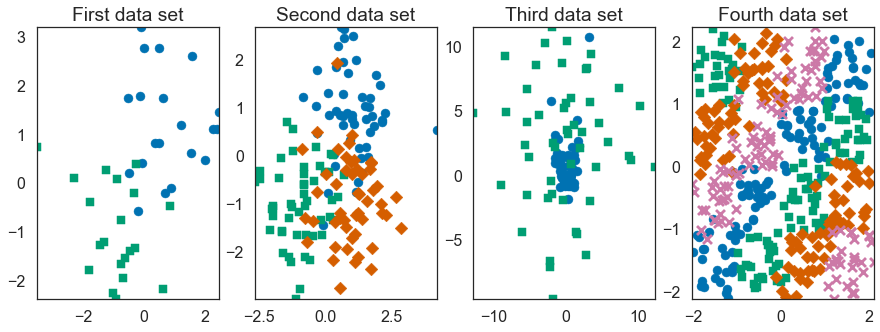

In [86]:
############################################################################
# Displaying labeled data
############################################################################

plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
plt.subplot(141)
plt.title('First data set')
plot_2d(data1[:, :2], data1[:, 2], w=None)

plt.subplot(142)
plt.title('Second data set')
plot_2d(data2[:, :2], data2[:, 2], w=None)

plt.subplot(143)
plt.title('Third data set')
plot_2d(data3[:, :2], data3[:, 2], w=None)

plt.subplot(144)
plt.title('Fourth data set')
plot_2d(data4[:, :2], data4[:, 2], w=None)

In [87]:
# On peut utiliser la LSE c'est à dire (moy(Xpartition)-X)**2

[ 0.          0.25892857  0.27008929  0.28348214  0.29910714  0.3125
  0.34375     0.4375      0.57589286  0.74330357  0.85491071  0.94419643
  0.95982143  0.97991071  0.99553571  0.99553571  1.          0.99776786
  1.          1.          1.          1.          1.          1.          1.        ]
[ 0.          0.25892857  0.27455357  0.29910714  0.34151786  0.43526786
  0.56473214  0.73214286  0.84821429  0.93973214  0.95758929  0.97767857
  0.98883929  0.99776786  0.99776786  1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.        ]


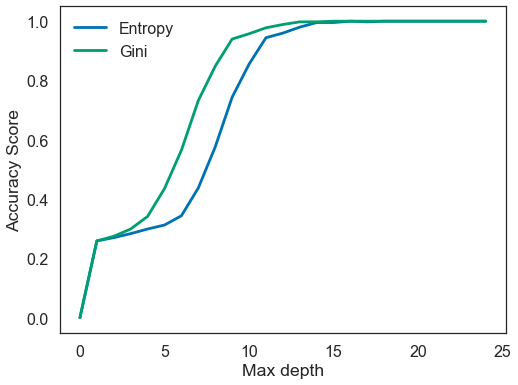

In [88]:
# Q2. Créer un objet 'arbre de décision' en spécifiant le critère de
# classification comme l'indice de gini ou l'entropie, avec la
# fonction 'DecisionTreeClassifier' du module 'tree'.

dtE = tree.DecisionTreeClassifier(criterion='entropy')
dtG = tree.DecisionTreeClassifier()

# Effectuer la classification d'un jeu de données simulées

data = data4
X = data4[:,:2]
Y = data4[:,2]

dtE.fit(X, Y)
dtG.fit(X,Y)
# Afficher les scores en fonction du paramètre max_depth

dmax = 25
scoresE = np.zeros(dmax)
scoresG = np.zeros(dmax)
plt.close(2)
plt.figure(2, figsize=(15, 10))

for i in range(1, dmax):
    dtE = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dtG = tree.DecisionTreeClassifier(max_depth=i)
    dtE.fit(X,Y)
    dtG.fit(X,Y)
    scoresE[i]=dtE.score(X,Y)
    scoresG[i]=dtG.score(X,Y)

print(scoresE)
print(scoresG)


plt.close(3)
plt.figure(3)
plt.plot(range(dmax), scoresE, label='Entropy')  
plt.plot(range(dmax), scoresG, label='Gini')
plt.xlabel('Max depth')
plt.ylabel('Accuracy Score')
plt.legend()

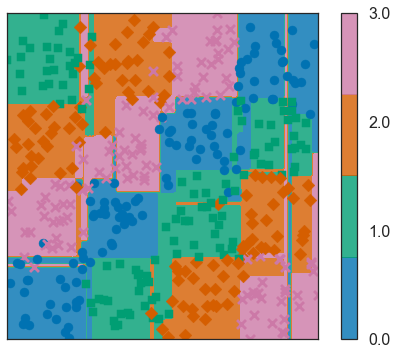

In [89]:
 #Q3 Afficher les frontières obtenues avec l'arbre pour le meilleur paramètre

dtG = tree.DecisionTreeClassifier()
dtG.fit(X,Y)
frontiere_new(lambda x: dtG.predict(x.reshape((1, -1))), X, Y, step=100)


In [33]:
# Q4.  Exporter la représentation graphique de l'arbre: Need graphviz installed

tree.export_graphviz(dtG, out_file="myTestTree.dot", filled=True)
os
os.system("dot -Tpdf myTestTree.dot -o myTestTree.pdf")
!open myTestTree.pdf
os.system("evince myTestTree.pdf")

open: Impossible d'ouvrir /dev/tty2: Permission non accordée


0

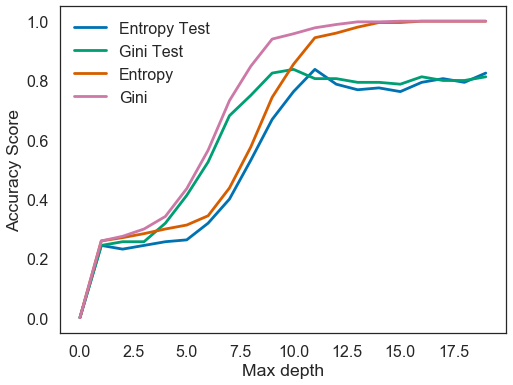

In [90]:
# Q5 : Génération de base de test

n1_1 = 40
n2_1 = 40
n3_1 = 40
n4_1 = 40
data_test = rand_checkers(n1_1, n2_1, n3_1, n4_1, sigma)
X_test = data_test[:, :2]
Y_test = data_test[:, 2].astype(int)


dmax = 20
scores = np.zeros(dmax)
plt.close(5)
plt.figure(5, figsize=(15, 10))

dtE_1 = tree.DecisionTreeClassifier(criterion='entropy')
dtG_1 = tree.DecisionTreeClassifier()
scoresE_1 = np.zeros(dmax)
scoresG_1 = np.zeros(dmax)
scoresE_T = np.zeros(dmax)
scoresG_T = np.zeros(dmax)

for i in range(1,dmax):
    dtE_1 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dtG_1 = tree.DecisionTreeClassifier(max_depth=i)
    dtE_1.fit(X,Y)
    dtG_1.fit(X,Y)
    scoresE_1[i]=dtE_1.score(X_test,Y_test)
    scoresG_1[i]=dtG_1.score(X_test,Y_test)
    scoresE_T[i]=dtE_1.score(X,Y)
    scoresG_T[i]=dtG_1.score(X,Y)

plt.close(6)
plt.figure(6)
plt.plot(range(dmax), scoresE_1, label='Entropy Test')  
plt.plot(range(dmax), scoresG_1, label='Gini Test')
plt.plot(range(dmax), scoresE_T, label='Entropy')  
plt.plot(range(dmax), scoresG_T, label='Gini')
plt.xlabel('Max depth')
plt.ylabel('Accuracy Score')
plt.legend()



In [91]:
# Q6. même question avec les données de reconnaissances de texte 'digits'

# Import the digits dataset
digits = datasets.load_digits()

n_samples = len(digits.data)
#X = digits.data[:n_samples // 2]  # digits.images.reshape((n_samples, -1))
#Y = digits.target[:n_samples // 2]
X_test = digits.data[n_samples // 2:]
Y_test = digits.target[n_samples // 2:]
Xd = digits.data
Yd =digits.target
Y_test.shape

(899,)

In [92]:
# Q7. estimer la meilleur profondeur avec un cross_val_score
dtGS= tree.DecisionTreeClassifier()
parameters = {'max_depth':range(1,15), 'criterion':['gini','entropy']}
clf = GridSearchCV(dtGS, parameters,cv=10, verbose=1, n_jobs=-1)
clf.fit(Xd,Yd)
clf.score(X_test, Y_test)
print(clf.best_estimator_)
print(clf.best_score_)



Fitting 10 folds for each of 28 candidates, totalling 280 fits
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.834724540902


[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    1.4s finished


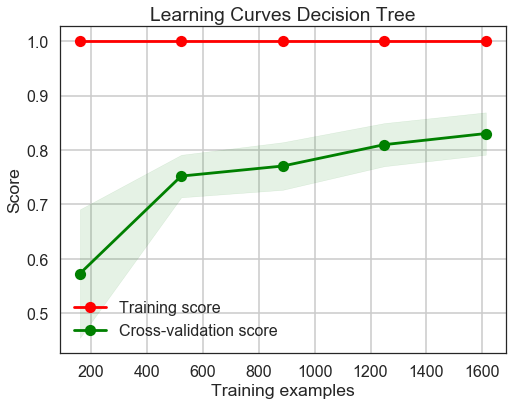

In [93]:
##Q8 Learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



title = "Learning Curves Decision Tree"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
cv=10

estimator = tree.DecisionTreeClassifier(max_depth=12, criterion='entropy')
plot_learning_curve(estimator, title, Xd, Yd, cv=cv, n_jobs=-1)


plt.show()

In [96]:
#Question 9
linreg = linear_model.LogisticRegression(C=1e5)
linreg.fit(X,Y)
linreg.score(X,Y)
#On obtient un score de 0.16 car les points ne sont pas separables par des plans affines

0.16294642857142858

In [97]:
# cela doit etre les coordonnées des vecteur directeur des plans separateurs
linreg.coef_.shape

(4, 2)

In [99]:
# cela doir etre l'ordonnée à l'origine des plans separateurs
linreg.intercept_.shape

(4,)

In [100]:
# C'est la moyenne des predictions justes sur l'echantillon donné

In [104]:
linreg.fit(Xd, Yd)
linreg.score(Xd,Yd)
#good learning

0.99888703394546463

In [108]:
#GridSearchCV on one versus rest and multinomial
parameters={'multi_class':['ovr','multinomial'], 'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga']}
gridlinreg = GridSearchCV(linreg, parameters, cv=10, n_jobs=-1, verbose=1 )
gridlinreg.fit(Xd,Yd)
print(gridlinreg.best_estimator_)
print(gridlinreg.best_score_)


Fitting 10 folds for each of 8 candidates, totalling 80 fits


/home/joseph/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/joseph/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/joseph/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/joseph/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/joseph/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the

/home/joseph/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/joseph/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/joseph/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/joseph/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/joseph/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)
0.937673900946
